# Chapter 2 - Statistical Learning
The topics of this chapter are:

 - Statistical Models
 - Basic R utilities. 


## Statistical Models

## Basic R Utilities

### Collections

#### Vectors, Matrices and Arrays
A vector is an ordered collection of objects of the same type

In [4]:
x <- c(2,7,5)
x

[1] 2 7 5

In [3]:
v_string <- c("AB", "BC", "CDE")
v_string

[1] "AB"  "BC"  "CDE"

R provides facilities to build vectors

In [5]:
s <- seq(from = 1, to = 10, by = 2) # or seq(1, 10, 2)
s

[1] 1 3 5 7 9

In [8]:
r <- rep(v_string, times = 2)  # repeats the content of the input vector
r

[1] "AB"  "BC"  "CDE" "AB"  "BC"  "CDE"

We can extract the elements we want from a vector by providing the list of indeces

In [9]:
r[c(2, 5)]

[1] "BC" "BC"

The matrix() function create a table from the given set of values 

In [10]:
z <- matrix(data = seq(1, 12), nrow = 4, ncol = 3) # or simply matrix(seq(1, 12), 4, 3)
z

1,5,9
2,6,10
3,7,11
4,8,12


In [11]:
z[3:4,2:3]

7,11
8,12


In [13]:
dim(z) # number of rows and columns

[1] 4 3

An array is a multi-dimensional collection of objects of the same type

In [14]:
a <- array(1:6, dim = c(2,3)) # matrix of two rows and three columns
a

1,3,5
2,4,6


A matrix is a bidimensional array. We often need to multiply matrices in linear algebra. In R we have to use a particular sintax to correctly multiply two matrices  

In [15]:
m1 <- array(1:6, dim = c(2,3))
m2 <- array(1:6, dim = c(3,2))
m1 %*% m2

22,49
28,64


We can see here the difference between the element-by-element dot operator and the scalar product of two vectors

In [11]:
v1 <- c(0.5, 0.5, 0.5, 0.5)
v2 <- c(0.5, 0.5, -0.5, -0.5)
v1 * v2 # the product opertor is applied to elements at the same position and a vector of the same size is returned
v1 %*% v2 # returns the sum of the products of the elements of the first (transposed) vector and the second vector 

[1]  0.25  0.25 -0.25 -0.25

0


#### List
A list is an ordered collection of named objects of different types and length.

In [16]:
l <- list("vector" = c(1, 2, 3), "array" = a, "string" = "Hello")
l$string

[1] "Hello"

#### Data frame
A data frame is a multi-dimensional collection of named objects whose elements can be of different types but all of the same length.

In [29]:
d <- data.frame("numbers" = c(1,2,3), "strings" = c("one", "two", "three"))
d[, 1] # print the first column

[1] 1 2 3

In [28]:
d$numbers

[1] 1 2 3

Filter records with a specific value. Here we filter the records of a data set by month and day.

In [31]:
airquality[airquality$Month == 5 & airquality$Day == 1, 1:6]

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1


#### Factors
The function factor() is used to define groups. It can be used to explicitly define a predictor as a qualitative variable even is it is expressed as integers.

In [44]:
x <- sample( x = c(1, 2), prob = c(0.5, 0.5), size = 10, replace = TRUE) # random sample of integers from the set {1, 2}
x
summary(x)
x <- factor(x, levels = c(1,2), labels = c("Non-smoker", "Smoker"))
x
summary(x)

[1] 2 2 2 2 2 1 2 1 2 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.25    2.00    1.70    2.00    2.00 

[1] Smoker     Smoker     Smoker     Smoker     Smoker     Non-smoker
 [7] Smoker     Non-smoker Smoker     Non-smoker
Levels: Non-smoker Smoker

Non-smoker     Smoker 
         3          7

As an additional example

In [48]:
size_string_codes <- c("xl", "large", "medium", "small")
size_number_codes <- c(55, 48, 42, 38)
t_shirts_number_code <- sample( x = size_number_codes, prob = c(0.1, 0.2, 0.5, 0.2 ), size = 10, replace = TRUE)
t_shirts_number_code[1:10]
t_shirts_string_code <- factor(t_shirts_number_code, levels = size_number_codes, labels = size_string_codes)
t_shirts_string_code[1:10]

[1] 42 38 42 38 48 38 42 48 55 42

[1] medium small  medium small  large  small  medium large  xl     medium
Levels: xl large medium small

### Plots
Plots of functions, histograms, contour plots, 3D plots

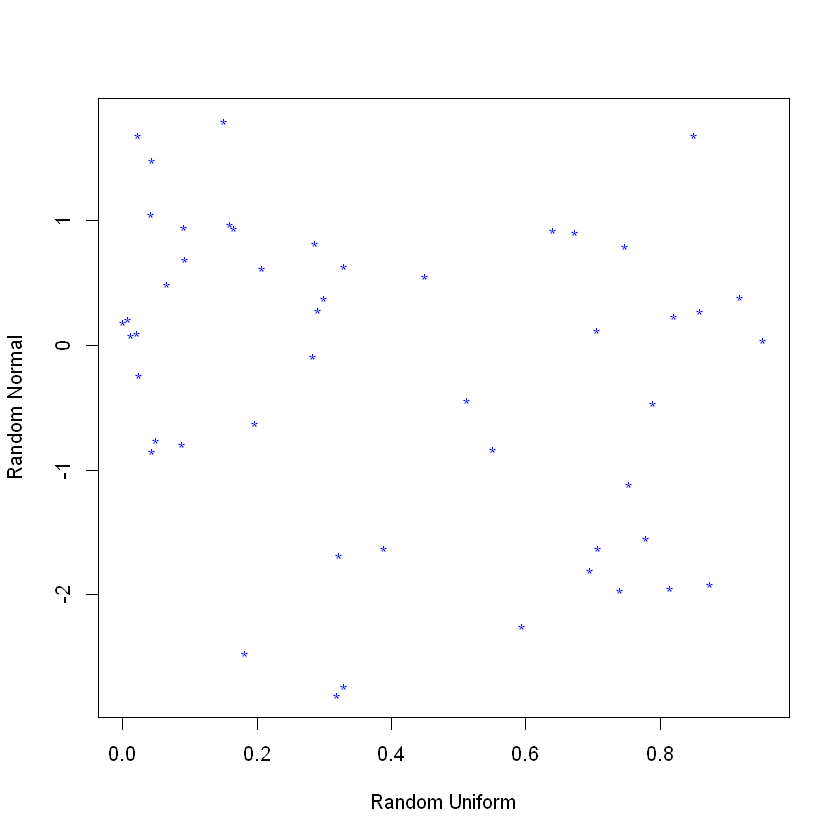

In [19]:
x <- runif(50) # sample data from the uniform distribution
y <- rnorm(50) # sample data from the Gaussian distribution 
plot(x, y, xlab="Random Uniform", ylab="Random Normal", pch="*", col="blue")

Histogram

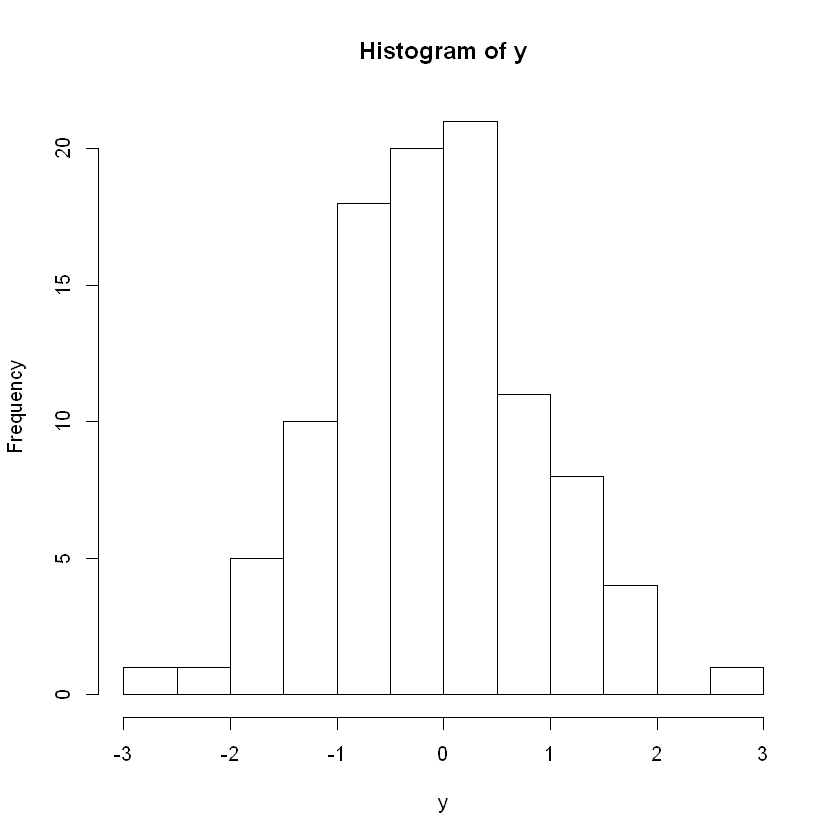

In [25]:
y <- rnorm(100)
hist(y)

Contour plot

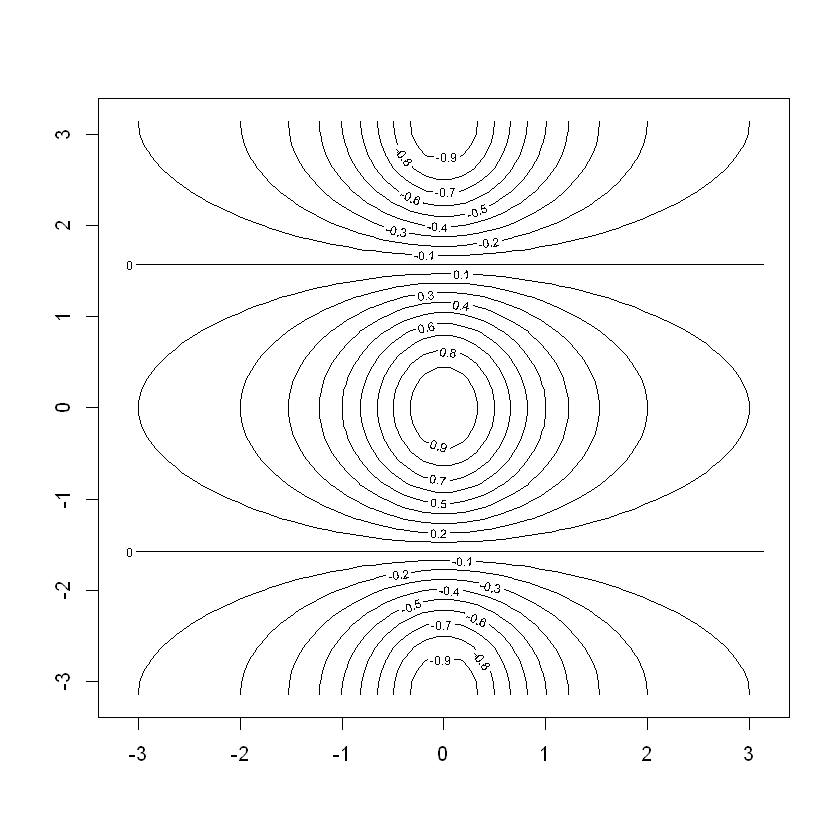

In [1]:
x <- seq(-pi, pi, length = 50)
y <- x
z <- outer(x, y, function(x, y) cos(y) / (1 + x^2)) # outputs a matrix of the function's values at each (x,y) pairs 
contour(x, y, z, nlevels = 15)

3D plot

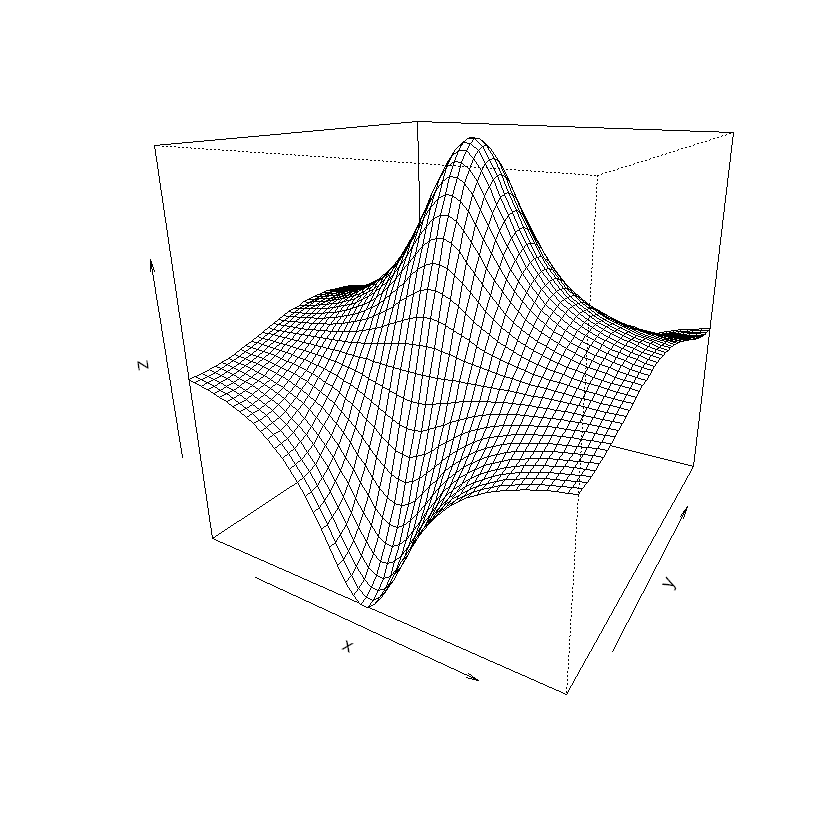

In [9]:
persp(x, y, z, theta = 30, phi = 20)

### Reading data

In [29]:
Auto <- read.csv("data/Auto.csv") # load data from a csv file into a data frame
names(Auto)
dim(Auto)
class(Auto)
summary(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

[1] 397   9

[1] "data.frame"

      mpg          cylinders      displacement     horsepower      weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   150    : 22   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.0   90     : 20   1st Qu.:2223  
 Median :23.00   Median :4.000   Median :146.0   88     : 19   Median :2800  
 Mean   :23.52   Mean   :5.458   Mean   :193.5   110    : 18   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   100    : 17   3rd Qu.:3609  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   75     : 14   Max.   :5140  
                                                 (Other):287                 
  acceleration        year           origin                  name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   ford pinto    :  6  
 1st Qu.:13.80   1st Qu.:73.00   1st Qu.:1.000   amc matador   :  5  
 Median :15.50   Median :76.00   Median :1.000   ford maverick :  5  
 Mean   :15.56   Mean   :75.99   Mean   :1.574   toyota corolla:  5  
 3rd Qu.:17.10   3rd Qu.:7

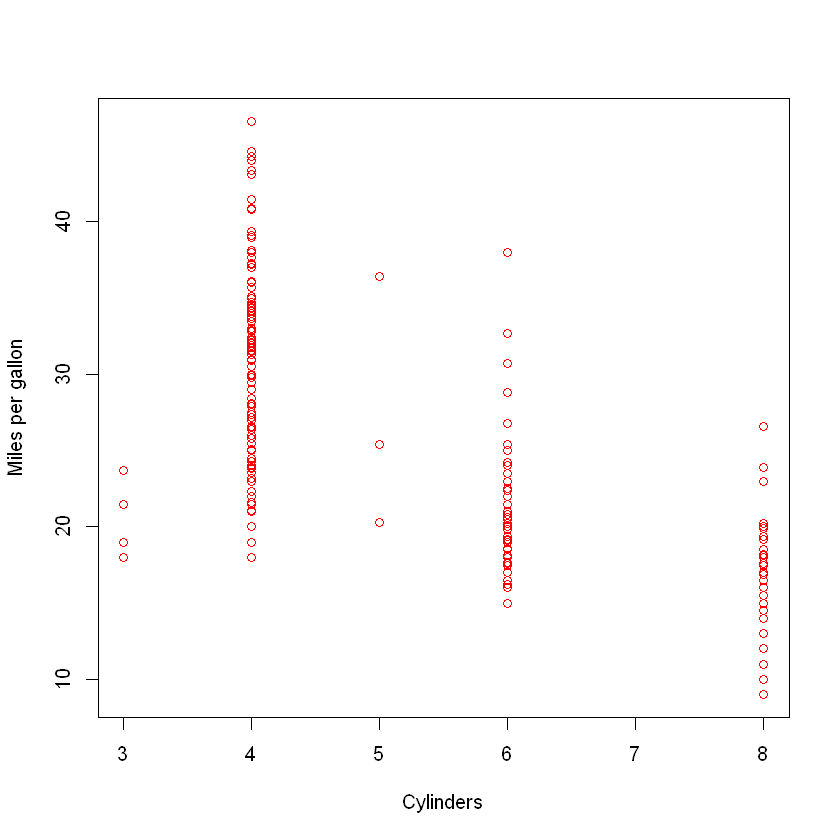

In [33]:
plot(Auto$cylinders,Auto$mpg, xlab="Cylinders", ylab="Miles per gallon", col="red")

Scatterplots

### Functions

In R pretty much everything is a function. Here we describe with an example how we can define a function and show some of the most useful in statistics that are available by default in R.

Sum of two integers

In [10]:
dist <- function(a, b) {
    # These function computes the Euclidean 
    # distance between two points in a one-dimensional
    # space
    d2 = a^2 + b^2
    sqrt(d2) # the last expression is the value returned
}

In [11]:
dist(3, 4)

[1] 5

#### apply()

In [12]:
apply(m1, MARGIN = 2, FUN = mean) # applies the mean function to each column in the m1 matrix

ERROR: Error in apply(m1, MARGIN = 2, FUN = mean): oggetto "m1" non trovato


In [13]:
apply(m1, MARGIN = 1, FUN = mean) # applies the mean function to each row in the m1 matrix

ERROR: Error in apply(m1, MARGIN = 1, FUN = mean): oggetto "m1" non trovato


#### sample()
It is used to take a sample from a space in which each element has a certain probability to occur. If the "replace" argument is set to TRUE, each element from the space can occur multiple times. For example the space can be made up of two elements, "HEAD" and "TAIL", each with probability 0.5 to occur.

In [35]:
sample( x = c("HEAD", "TAIL"), prob = c(0.5, 0.5), size = 10, replace = TRUE)

[1] "TAIL" "TAIL" "HEAD" "TAIL" "TAIL" "TAIL" "TAIL" "HEAD" "HEAD" "TAIL"